<a href="https://colab.research.google.com/github/SolomonAmaning/Data-Science-Projects/blob/main/Foreign_Exchange_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#USD/GBP RATES FORECAST FOR NEXT 10 YEARS i.e 2033  (SOLOMON AMANING ODUM)

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
df = pd.read_csv('/content/drive/MyDrive/HistoricalPrices.csv')

In [3]:
df.head()

,Date,Pair,Open,High,Low,Close
0,6/14/2023,USD/GBP,0.7930,0.7937,0.7874,0.7896
1,6/13/2023,USD/GBP,0.7997,0.7998,0.7920,0.7929
2,6/12/2023,USD/GBP,0.7954,0.8010,0.7936,0.7992
3,6/9/2023,USD/GBP,0.7961,0.7978,0.7943,0.7953
4,6/8/2023,USD/GBP,0.7961,0.7961,0.7961,0.7961


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

In [5]:
df.head()

,Pair,Open,High,Low,Close
Date,,,,,
2023-06-14,USD/GBP,0.7930,0.7937,0.7874,0.7896
2023-06-13,USD/GBP,0.7997,0.7998,0.7920,0.7929
2023-06-12,USD/GBP,0.7954,0.8010,0.7936,0.7992
2023-06-09,USD/GBP,0.7961,0.7978,0.7943,0.7953
2023-06-08,USD/GBP,0.7961,0.7961,0.7961,0.7961


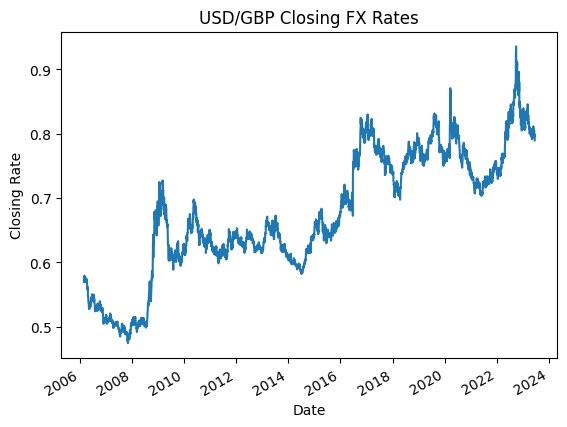

In [6]:
df['Close'].plot()

plt.title('USD/GBP Closing FX Rates')

plt.xlabel('Date')

plt.ylabel('Closing Rate')

plt.show()

In [7]:
# Extracting the close column
data = df['Close'].values.reshape(-1, 1)

In [8]:
# using min-max scaler to normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(data)

In [9]:
# Splitting the data into training and testing sets
train_size = int(len(normalized_data) * 0.8)
train_data = normalized_data[:train_size]
test_data = normalized_data[train_size:]

###Time Series Modelling

In [10]:
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

# Set the number of time steps for input
time_steps = 10

# Create training and testing datasets in supervised learning format
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)



## LSTM model creation

In [11]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_steps, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
113/113 [==============================] - 4s 8ms/step - loss: 0.0106
Epoch 2/50
113/113 [==============================] - 1s 8ms/step - loss: 3.6593e-04
Epoch 3/50
113/113 [==============================] - 1s 8ms/step - loss: 3.7035e-04
Epoch 4/50
113/113 [==============================] - 1s 8ms/step - loss: 3.7720e-04
Epoch 5/50
113/113 [==============================] - 1s 8ms/step - loss: 3.6423e-04
Epoch 6/50
113/113 [==============================] - 1s 8ms/step - loss: 3.7340e-04
Epoch 7/50
113/113 [==============================] - 1s 8ms/step - loss: 3.5726e-04
Epoch 8/50
113/113 [==============================] - 1s 8ms/step - loss: 3.6427e-04
Epoch 9/50
113/113 [==============================] - 1s 10ms/step - loss: 3.4660e-04
Epoch 10/50
113/113 [==============================] - 1s 12ms/step - loss: 3.5560e-04
Epoch 11/50
113/113 [==============================] - 1s 10ms/step - loss: 3.1740e-04
Epoch 12/50
113/113 [==============================] - 1s 8ms/st

In [12]:
# Making predictions on the testing data using the above fitted model
predictions = model.predict(X_test)

28/28 [==============================] - 1s 3ms/step


In [13]:
# Inversely transforming the predictions and actual values to their original scales
predicted_values = scaler.inverse_transform(predictions)
actual_values = scaler.inverse_transform(y_test)

In [14]:
# Creating a date range for the predictions
prediction_dates = pd.date_range(start=df.index[train_size + time_steps], periods=len(predictions))

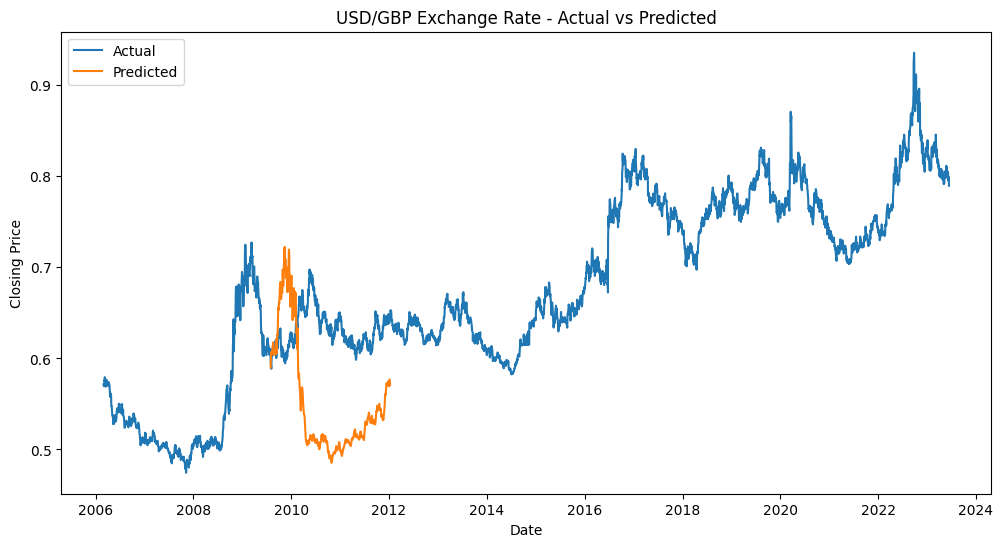

In [15]:
# Plotting the predicted values along with the actual values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual')
plt.plot(prediction_dates, predicted_values, label='Predicted')
plt.title('USD/GBP Exchange Rate - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

I will have to tune the model's hyperparameters to improve learning. I tried this so that I can check the visualization of its prediction. I used LSTM because it is now the talk of the day. Deep learning is gaining more popularity.

## Adding future predictions

In [16]:
# Defining the number of future time steps 10 years to 365 days
future_steps = 10 * 365


In [17]:
# Generating future time steps
future_dates = pd.date_range(start=df.index[-1], periods=future_steps+1)[1:]

In [18]:
# Fetching the last 'time_steps' data points from the test set
last_sequence = test_data[-time_steps:]

In [19]:
# Reshaping and expanding dimensions to match the LSTM input shape
last_sequence = last_sequence.reshape(1, time_steps, 1)

## Using the LSTM to generate the Future Step

In [20]:
# Generating the forecast for the future time steps
forecast = []
for _ in range(future_steps):
    prediction = model.predict(last_sequence)
    forecast.append(prediction)
    last_sequence = np.append(last_sequence[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)

1/1 [==============================] - 0s 26ms/step


In [21]:
''' Let me create another array of future dates
for  interactive plot since I used different variables
in the early one for the LSTM training to save time and avoid retraining '''

future_dates = pd.date_range(start='2024-01-01', periods=3650, freq='D')


In [22]:
# Scale the future dates
future_dates_scaled = scaler.transform(future_dates.values.reshape(-1, 1))

In [23]:
# Reshape the input data for LSTM model prediction
X_future = future_dates_scaled.reshape(-1, time_steps, 1)

In [24]:
# Prediction
future_preds = model.predict(X_future)

12/12 [==============================] - 0s 3ms/step


In [25]:
# Inversely transforming the predicted values to their original scales
future_preds = scaler.inverse_transform(future_preds)

In [26]:
# Combine original and forecasted values
all_dates = pd.date_range(start=df.index[0], end=df.index[-1]).union(future_dates)
all_values = np.concatenate((df['Close'].values, future_preds.flatten()))

## Visualizing the Forecast

In [27]:
# Using plotly for the visualization
fig = go.Figure()

# Add actual data trace
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['Close'],
    mode='lines',
    name='Actual',
))

# Add forecast data trace
fig.add_trace(go.Scatter(
    x=all_dates,
    y=all_values[:len(all_dates)],
    mode='lines',
    name='Forecast',
))

# Set axis labels and title
fig.update_layout(
    title='USD/GBP Exchange Rate - Actual vs Forecast',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Closing Price'),
)

# Enable hover mode
fig.update_layout(hovermode='x')

# Show the plot
fig.show()